Applied neural style transfer to blend the artistic style of a reference image with the content of another image using a pretrained deep learning model in Google Colab.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

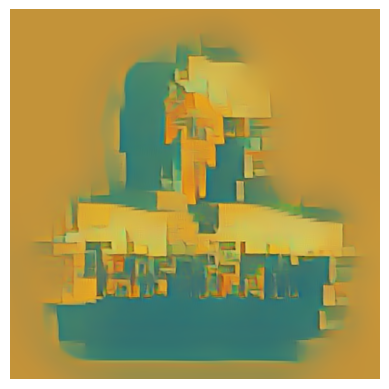

In [ ]:
# Neural Style Transfer (Simple – Google Colab)

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os # Import os module to check for file existence
import requests # Import requests for more robust downloading

# Load images
def load_img(path):
    img = Image.open(path)
    img = img.resize((512, 512))
    # Ensure image has 3 channels (RGB) if it's not already
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = np.array(img)/255.0
    return img[np.newaxis, ...].astype(np.float32) # Explicitly cast to float32

# Define paths for content and style images
content_filename = "content.png"
style_filename = "style.png"

# Define the cache directory (where files will be saved)
cache_dir = "/content/"

content_image_path = os.path.join(cache_dir, content_filename)
style_image_path = os.path.join(cache_dir, style_filename)

# Check if content image exists, otherwise download an example
if not os.path.exists(content_image_path):
    print("Content image not found, downloading an example.")
    content_url = "https://www.tensorflow.org/images/tf_logo_social.png"
    try:
        response = requests.get(content_url, stream=True)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
        with open(content_image_path, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
    except requests.exceptions.RequestException as e:
        print(f"Error downloading content image: {e}")
        # Fallback to an existing reliable image if direct download fails
        # For this example, we'll let it fail if requests fails, assuming it's a critical error

# Check if style image exists, otherwise download an example
if not os.path.exists(style_image_path):
    print("Style image not found, downloading an example.")
    style_url = "https://www.tensorflow.org/images/colab_logo_32px.png"
    try:
        response = requests.get(style_url, stream=True)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)
        with open(style_image_path, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
    except requests.exceptions.RequestException as e:
        print(f"Error downloading style image: {e}")

content_img = load_img(content_image_path)   # upload your content image
style_img   = load_img(style_image_path)     # upload your style image

# Load model
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Apply style transfer
stylized_img = model(tf.constant(content_img), tf.constant(style_img))[0]

# Show output
plt.imshow(stylized_img[0])
plt.axis("off")